# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2020/2021
## Assignment #5 - Estimated Sample Distribution + Empirical Sampling 


***
### Group: C
### Names of members:  

1. Aida Usmanova
2. Emilio Brambilla
3. Navneet Singh Arora

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://python3.guide/), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=582), especially L08 & L09. **Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and **every** task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, 19 January 2021, 19:59 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, 27 January 2021,  12:00 - 13:30 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A05_Group_A.ipynb 
2. RM_A05_Group_A.pdf

***
***

#### Task 1 **[50 points]  Compare 2 samples**

In your last assignment A04 you conducted your own study. Please use your own sample and compare it to a sample of another group. Please answer this question: *Is there a significant difference between your study results and the other groups result in 'hours of sleep per night'?*

1. Make sure your dataframe and/or .csv are ready to share (variable 'hours of sleep') with the other groups. a. Use the results of the group with the following letter in the alphabeth. (Group A uses Group B's ... Group[last letter] takes Group A's results.)
2. Make your samples comparable. 
3. State  $H_0$ & $H_1$ for the above mentioned question. 
4. a. Choose a method to compare the 2 samples (their scores, not frequencies) and why you chose this method.<br> 
   b. State the assumptions (nominal-ratio, continuous, N, normal distributed?) .<br>
   c. State the parameters you used and compute.
5. Report scientifically your result and discuss.
6. What is the power and the effect size of the test you used? Compute & report


#### Task 1: Compare 2 samples

In your last assignment A04 you conducted your own study. Please use your own sample and compare it to a sample of another group. Please answer this question: *Is there a significant difference between your study results and the other groups result in 'hours of sleep per night'?*



***

#### Question 1.1  
Make sure your dataframe and/or .csv are ready to share (variable 'hours of sleep') with the other groups.  

a. Use the results of the group with the following letter in the alphabeth. (Group A uses Group B's ... Group[last letter] takes Group A's results.)

#### Solution 1.1

The data collected by our group **(Group C)** through the study conducted in the previous assignment **(A04)** was cleaned, adjusted and the resulting csv was shared with **Group A**.  

Similarly, we received the study results from **Group D** in the csv format and hence will be used for this study.

***

#### Question 1.2  
Make your samples comparable.

In [1]:
# Importing Required Libraries for python computation and setting display options

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
import requests
import io
import datetime
from plotly import tools, subplots
from statsmodels.stats.power import tt_ind_solve_power, TTestIndPower

In [2]:
# Fetching study data for both Group C and Group D for further analysis

study_data_group_c = pd.read_csv("Group_C_Sleep_Questionnaire.csv")
study_data_group_d = pd.read_csv("Group_D_Sleep_Questionnaire.csv")

In [3]:
# Using plotly to plot the study data table for both Group C and Group D

study_data_table_plot_group_c = go.Figure(data=[go.Table(header=dict(values=list(study_data_group_c.columns[:5]),
                                                         align='left',
                                                         line_color='black',
                                                         fill_color='lightgray',
                                                         font=dict(size=14),
                                                         height=30),
                                             cells=dict(values=study_data_group_c.head(8).transpose()[:5],
                                                        align='left',
                                                        line_color='black',
                                                        fill_color='white',
                                                        height=30))]);
study_data_table_plot_group_c.update_layout(width=800,
                        height=750,
                        title_text="Table-1: Data Collected through the Study on Sleep Patterns <br> Group - C",
                        title_x=0.5);

In [4]:
# Using plotly to plot the study data table for both Group C and Group D

study_data_table_plot_group_d = go.Figure(data=[go.Table(header=dict(values=list(study_data_group_d.columns[:5]),
                                                         align='left',
                                                         line_color='black',
                                                         fill_color='lightgray',
                                                         font=dict(size=14),
                                                         height=30),
                                             cells=dict(values=study_data_group_d.head(8).transpose()[:5],
                                                        align='left',
                                                        line_color='black',
                                                        fill_color='white',
                                                        height=30))]);
study_data_table_plot_group_d.update_layout(width=800,
                        height=750,
                        title_text="Table-2: Data Collected through the Study on Sleep Patterns <br> Group - D",
                        title_x=0.5);

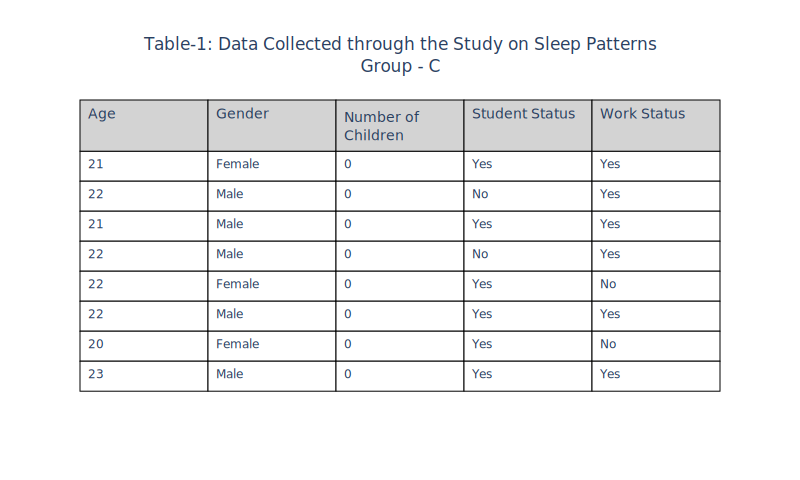

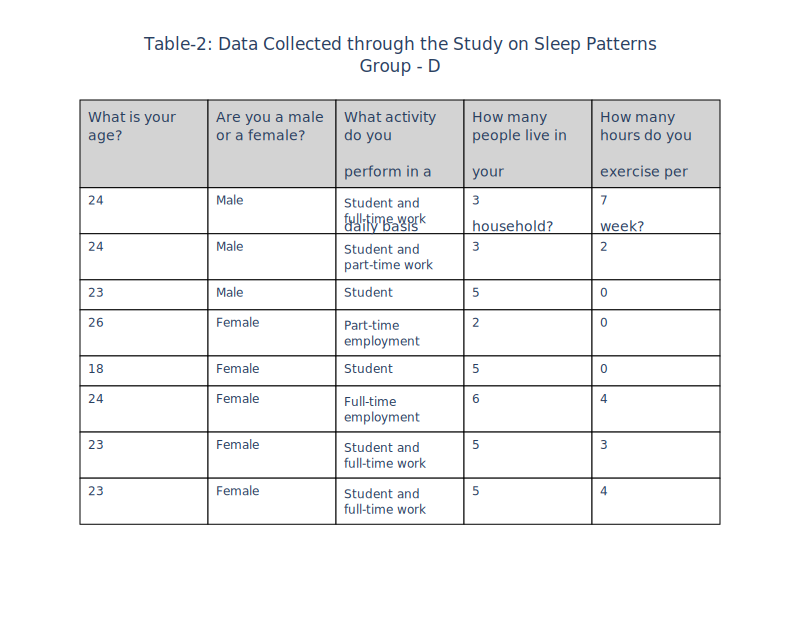

In [5]:
# Displaying the respective tables

study_data_table_plot_group_c.show(renderer='svg', width=800, height=480)
study_data_table_plot_group_d.show(renderer='svg', width=800, height=620)

We further clean up the data for both the studies, by removing the columns which are not required at this point of time and thus, keeping only 3 columns namely: **Age, Gender, and Sleep**.  

These are the common set of columns which are used in both the studies, thus making the two datasets **Highly Comparable**

In [6]:
# Selecting the relevant columns from to make the datasets comparable

# Group C Data Cleaning
study_data_group_c = study_data_group_c[study_data_group_c.columns[study_data_group_c.columns.isin(['Age', 'Gender', 'Total Sleep Hours'])]]
study_data_group_c['Total Sleep Hours'] = study_data_group_c['Total Sleep Hours'].round(0).astype(int)

# Group D Data Cleaning
# Selecting important columns from second dataset
study_data_group_d = study_data_group_d[study_data_group_d.columns[study_data_group_d.columns.isin(['What is your age?', 'Are you a male or a female?', 'How many hours do you sleep on average per night?'])]]
columns = study_data_group_d.columns
new_columns ={
    'What is your age?'                                                          :'Age', 
    'Are you a male or a female?'                                                :'Gender',
    'How many hours do you sleep on average per night?'                          :'Total Sleep Hours'
}   

study_data_group_d = study_data_group_d.rename(columns = new_columns);
study_data_group_d['Total Sleep Hours'] = study_data_group_d['Total Sleep Hours'].round(0).astype(int)

In [7]:
# Using plotly to plot the study data table for both Group C and Group D

study_data_table_plot_group_c = go.Figure(data=[go.Table(header=dict(values=list(study_data_group_c.columns[:5]),
                                                         align='left',
                                                         line_color='black',
                                                         fill_color='lightgray',
                                                         font=dict(size=14),
                                                         height=30),
                                             cells=dict(values=study_data_group_c.head(8).transpose()[:5],
                                                        align='left',
                                                        line_color='black',
                                                        fill_color='white',
                                                        height=30))]);
study_data_table_plot_group_c.update_layout(width=800,
                        height=750,
                        title_text="Table-3: Cleaned Up Data <br> Group - C",
                        title_x=0.5);

In [8]:
# Using plotly to plot the study data table for both Group C and Group D

study_data_table_plot_group_d = go.Figure(data=[go.Table(header=dict(values=list(study_data_group_d.columns[:5]),
                                                         align='left',
                                                         line_color='black',
                                                         fill_color='lightgray',
                                                         font=dict(size=14),
                                                         height=30),
                                             cells=dict(values=study_data_group_d.head(8).transpose()[:5],
                                                        align='left',
                                                        line_color='black',
                                                        fill_color='white',
                                                        height=30))]);
study_data_table_plot_group_d.update_layout(width=800,
                        height=750,
                        title_text="Table-4: Cleaned Up Data <br> Group - D",
                        title_x=0.5);

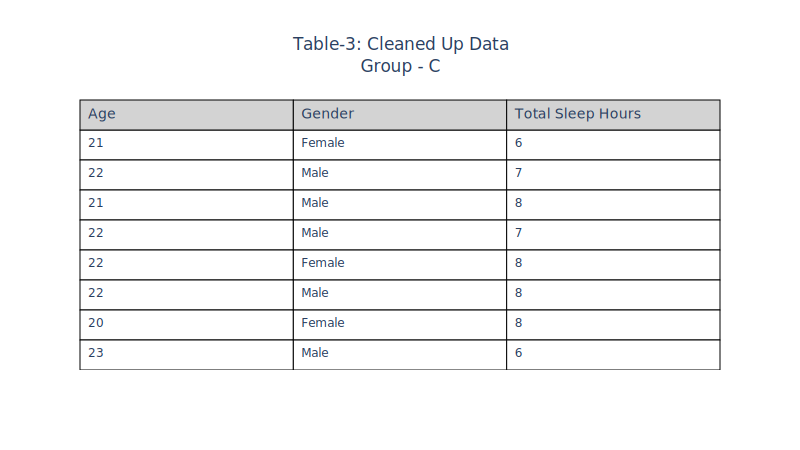

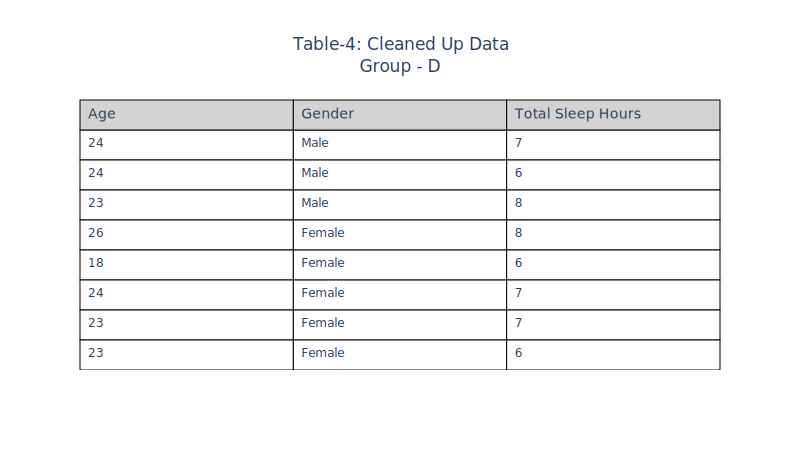

In [9]:
# Displaying the respective tables

study_data_table_plot_group_c.show(renderer='svg', width=800, height=450)
study_data_table_plot_group_d.show(renderer='svg', width=800, height=450)

***

#### Question 1.3  
State $H_0$ & $H_1$ for the above mentioned question. 

#### Solution 1.3  

**Question:** ***Is there a significant difference between your study results and the other groups result in 'hours of sleep per night'?***  

For this mentioned question, we state our hypothesis as below:  

$H_0$: $\mu 1$ = $\mu 2$ (There is no significant difference in sleep hours between 2 samples)  
$H_1$: $\mu 1$ ≠ $\mu 2$ (There is a significant difference in sleep hours between 2 samples)

$\mu 1$ is mean of sleep hours per night from Group-C's dataset  
$\mu 2$ is mean of sleep hours per night from Group-D's dataset

***

#### Question 1.4  
a. Choose a method to compare the 2 samples (their scores, not frequencies) and why you chose this method.<br> 
b. State the assumptions (nominal-ratio, continuous, N, normal distributed?) .<br>
c. State the parameters you used and compute.

#### Solution 1.4.a

To compare the 2 samples, we will use Two-Sample t-Test, beacuse two samples are independent and are randomly sampled from normal population. We use this method to determine if the unknown population means of two groups are equal or not.

#### Solution 1.4.b

Our assumptions to choose Two-Sample t-Test are as below:  

1. We assume the people measured represent a random sample from the population of the whole world. In other words, data in each group is obtained via a random sample from the population.
2. Two samples are independent, because the measurements were taken from different people. So the measurements for one observation do not affect measurements for another observation.
3. The data values are sleep hours measurements. The measurements are continuous.
4. We assume the data are normally distributed.
5. We assume the variances for two samples are equal.

#### Solution 1.4.c

To perform afformentioned test we need following parameters: **Mean, Sample Variance and Sample Size.**

***

#### Question 1.5  
Report scientifically your result and discuss.

#### Solution 1.5

In [10]:
# Checking the Sample Sizes and Sample Variances for both the Groups

group_c_sample_size = study_data_group_c.shape[0]
group_d_sample_size = study_data_group_d.shape[0]

group_c_std_var = study_data_group_c['Total Sleep Hours'].var()
group_d_std_var = study_data_group_d['Total Sleep Hours'].var()

print("Sample size (sample C): ", group_c_sample_size)
print("Sample size (sample D): ", group_d_sample_size)

print("Standard variance (sample C): ", group_c_std_var)
print("Standard variance (sample D): ", group_d_std_var)

Sample size (sample C):  30
Sample size (sample D):  32
Standard variance (sample C):  0.9436781609195406
Standard variance (sample D):  0.9344758064516129


As it can be seen , even though the **Variances are similar** for both the samples but we have **Unequal Sample Sizes**. This means that to test our hypothesis we must perform **Welch's t-Test**.  

Our significance level (alpha) will be 5%.

In [11]:
# Performing Welch's t-test

def welch_t(a,b, equal_var=False, describe=True):
    
    # Calculate degrees of freedom
    dof_num = (a.var()/a.size + b.var()/b.size)**2
    dof_den =(a.var()/a.size)**2 / (a.size-1) + (b.var()/b.size)**2 / (b.size-1)
    dof = dof_num/dof_den
    
    # Perform Welch's t-test
    test, p_val = stats.ttest_ind(a,b, equal_var = equal_var)

    if describe:
        print(f"Welch's t-test = {test}\np-value: {p_val}\nDoF: {dof}")
    
        # Print decision.
        if p_val<0.05:
            print('Decision: Reject the null hypothesis')
        else:
            print('Decision: Fail to reject the null hypothesis')
            
    return stats.ttest_ind(a,b, equal_var = False)

In [12]:
welch_t(study_data_group_c['Total Sleep Hours'], study_data_group_d['Total Sleep Hours'])

Welch's t-test = 1.6325666740837788
p-value: 0.10782388012026756
DoF: 59.703055471641605
Decision: Fail to reject the null hypothesis


Ttest_indResult(statistic=1.6325666740837788, pvalue=0.10782388012026756)

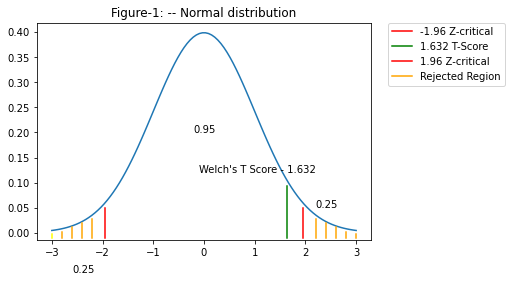

In [13]:
# Displaying Normal Distribution to explain how the testing will be done

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Figure-1: -- Normal distribution')
plt.text(-0.2, 0.2, "0.95")
plt.text(-2.6, -0.08, "0.25")
plt.text(2.2, 0.05, "0.25")
plt.text(-0.1, 0.12, "Welch's T Score - 1.632")
plt.axvline(x=-1.96, ymin=0.01, ymax=0.15, color='red', label='-1.96 Z-critical')
plt.axvline(x=-2.2, ymin=0.01, ymax=0.1, color='orange')
plt.axvline(x=-2.4, ymin=0.01, ymax=0.08, color='orange')
plt.axvline(x=-2.6, ymin=0.01, ymax=0.06, color='orange')
plt.axvline(x=-2.8, ymin=0.01, ymax=0.04, color='orange')
plt.axvline(x=-3, ymin=0.01, ymax=0.03, color='yellow')
plt.axvline(x=1.632, ymin=0.01, ymax=0.25, color='green', label='1.632 T-Score')
plt.axvline(x=1.96, ymin=0.01, ymax=0.15, color='red', label='1.96 Z-critical')
plt.axvline(x=2.2, ymin=0.01, ymax=0.1, color='orange')
plt.axvline(x=2.4, ymin=0.01, ymax=0.08, color='orange')
plt.axvline(x=2.6, ymin=0.01, ymax=0.06, color='orange')
plt.axvline(x=2.8, ymin=0.01, ymax=0.04, color='orange')
plt.axvline(x=3, ymin=0.01, ymax=0.03, color='orange', label='Rejected Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

After performing the **Welch's t-Test**, we get a test statistic **T** of **1.632**. This means it is less than the critical value of 1.96, thus falling inside the critical value accepted range.  

Also, the **p-value** is **0.1078** which is greater than the **significance level of 0.05** i.e.  **0.1078 > 0.05**  

Since **p-value > $\alpha$** , **$H_0$ is accepted**.  

The average of Group-C's population is considered to be equal to the average of Group-D's population. In other words, the difference between the average of the Group-C and Group-D populations is not big enough to be statistically significant.

***

#### Question 1.6  
What is the power and the effect size of the test you used? Compute & report

#### Solution 1.6

As we found our p-value, we have to find out the effect size of sleep hours. The larger the effect size, the less likely it is to be random error.

Effect size is the magnitude of the difference between groups. To check the effect size we will use **Cohen's Effect Size**, as it is used for the comparison between two means. From this approach **d** value tells the difference by standard deviation.

In [14]:
#Cohen's d Effect size

def cohen_d(a,b, describe = True):
    a_n,b_n = len(a),len(b)

    # Calculate pooled standard deviation.
    pv_num = ((a_n-1)*a.var())+((b_n-1)*b.var())
    pv_den = a_n+b_n
    pooled_sd = np.sqrt(pv_num/pv_den)
    d = (a.mean()-b.mean())/pooled_sd
    
    if describe:
        print("Cohens'd: ",d)
        if d<0.20:
            print('Effect Size: Very Small')
        elif d<0.50:
            print('Effect Size: Small')
        elif d<0.80:
            print('Effect Size: Medium')
        else:
            print('Effect Size: Large')
            
    return d

In [15]:
d = cohen_d(study_data_group_c['Total Sleep Hours'], study_data_group_d['Total Sleep Hours'])

Cohens'd:  0.4218141662023913
Effect Size: Small


Now that we now that the effect size of sleep hours is small. This means that two groups' means (averages) don't differ by 0.4 standard deviations or more, the difference is trivial, even if it is statistically significant.

Knowing Cohen's d effect size value we calculate power of  Two-sample t-Test with different with sample sizes.

In [16]:
from statsmodels.stats.power import tt_ind_solve_power, TTestIndPower

power = tt_ind_solve_power(effect_size=d, nobs1=30, alpha=0.05, ratio=1.06, alternative='two-sided')
print("Power of the Test is : ", str(power))

Power of the Test is :  0.37114076899892634


The power of test is 0.37 and $\beta$ = 0.63. We have a high risk of Type II error (Accepting Null Hypothesis while it is false).

#### Conclusion:

So in this study we use the data collected through the experiment which was conducted for A04 by both Group C and Group D to determine if *there is a significant difference between our study results and the other groups result in 'hours of sleep per night'?*  

In order to come up with any result, both the datasets were cleaned up, adjusted and made comparable in order to proceed with the study using Age, Gender and Sleep as the main variables.  

After the cleanup activity, hypothesis were formulated, both null hypothesis ($H_0$) and alternate hypothesis ($H_1$) as below:  
$H_0$: $\mu 1$ = $\mu 2$ (There is no significant difference in sleep hours between 2 samples)  
$H_1$: $\mu 1$ ≠ $\mu 2$ (There is a significant difference in sleep hours between 2 samples)

$\mu 1$ is mean of sleep hours per night from Group-C's dataset  
$\mu 2$ is mean of sleep hours per night from Group-D's dataset  

Not only this, but certain assumptions were made before proceeding with the test where we assume have random samples from the whole population and one observation does not have any effect on the other observation, therefore independent. The measurements are assumed to be continuous, having equal variances and data being normally distributed.  

Taking all these assumptions into consideration, Two-Sample t-Test was chosen to perform the statistical analysis using mean, variance and sample sizes. Further analysis lead to the use of Welch's t-Test because of the presence of unequal sample sizes.  

Performing the Welch's t-Test provided us with some significant results with T-Score = 1.632, thus falling inside the accepted region and its corresponding p-value = 0.10 which is much greater than the set significance level of 5% i.e. 0.05. Thus, accepting the null hypothesis $H_0$. Also, from the Cohen's method, which was used to compute the power and effect size, we saw that the effect size = 0.421, which is small. Thus leading to a Weak Test Power of 0.37. As the power of hypothesis test signifies the probability of correctlt rejecting the null hypothesis. Therefore, low power indicates that there is not enough evidence to reject the null hypothesis $H_0$. Therefore statting that *there is no significant difference between our study results and the other group's result in 'hours of sleep per night'.*

***
***

#### Task 2 **[50 points] Simulation of Experiment**
Imagine, as follow up question to your "Sleep study" you would like to ask this question *„Please rate your given average of sleep?“* to your group of women (F) and men (M). 
0. What can you expect if you use a Likert Scale? 
Likert scale: [too little, a bit too little, just right, a bit too much, too much -- "sleep"] code the answers with those number: -2, -1, 0, 1, 2

Your job is to simulate the process using Monte-Carlo. 

Assumptions: The ground truth are continuous, normally distributed values around expected means that people could give if asked on a continuous scale. 

Hypotheses: $H_0$:𝜇1=𝜇2, $H_1$:𝜇1≠𝜇2

The aim of this exercise is to understand how Likert-Scales can be evaluated using Monte Carlo. Write your code in a way to quickly explore different parameters/biases/methods. Vizualize and interprete on your diagrams and results.

1.  a. How do the sampling distributions look like for $H_0$ and $H_1$ for varying means and effect sizes? (M / F) (Report/Visualize)<br>
    b. If you look back at your study which would be your expected tuple of means (M, F) on the Likert scale -2 to 2. E.g., (0,-2)<br> 
    c. Use the given expected means + your expected mean tuple from 1b. :(1,-1), (1,0), (1.5, 0.5), (-2,-1) and use at least 2 different standard diviations <br>
    d. Plot frequencies and likert scale values for each tuple and the sds <br>
    e. What is your test statistic and why? <br>
    f. What is your sample size and sampling size? Why?
2. What is the power of the t-test (2 sample, independent) and the Mann-Whitney-U test? Compute for the expected mean tuples and sds. Interprete your results.
3. How could you model common biases (at least 2) and how would they affect the outcome and power? Use the tuple means and sds, compute, interprete, and vizualize.
4. For the case (1.5, 0.5), how large would the sample have to be to get a power of 80% at α=5%? Use the different sds.

#### Task 2: Simulation of Experiment  

Imagine, as follow up question to your "Sleep study" you would like to ask this question *„Please rate your given average of sleep?“* to your group of women (F) and men (M). 
0. What can you expect if you use a Likert Scale? 
Likert scale: [too little, a bit too little, just right, a bit too much, too much -- "sleep"] code the answers with those number: -2, -1, 0, 1, 2

Your job is to simulate the process using Monte-Carlo. 

Assumptions: The ground truth are continuous, normally distributed values around expected means that people could give if asked on a continuous scale. 

Hypotheses: $H_0$:𝜇1=𝜇2, $H_1$:𝜇1≠𝜇2

The aim of this exercise is to understand how Likert-Scales can be evaluated using Monte Carlo. Write your code in a way to quickly explore different parameters/biases/methods. Vizualize and interprete on your diagrams and results.

***

In [17]:
# Importing required libraries for further computation

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import math
import numpy as np
import scipy as sp 
import random
import plotly.figure_factory as ff
import plotly
from scipy.stats import truncnorm
from plotly import tools, subplots

In [18]:
from scipy.stats import truncnorm

def get_truncated_normal(mean, sd, low, upp):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def get_norm(mean, sd, samples, lower, upper):
    X = get_truncated_normal(mean, sd, lower, upper)
    return X.rvs(samples)

def getdist(mean, std_dev, num, low, upp):
    dist = stats.truncnorm((low - mean) / std_dev, (upp - mean) / std_dev, loc=mean, scale=std_dev)
    values = dist.rvs(num)
    values = list(map(lambda x: round(x),values))
    return values

In [19]:
def monte_carlo_simulation_histogram(male_mean, female_mean, std_1, std_2, samples, sampling, number, norm, lower, upper, bias):
    
    for i in range(sampling):
        
        if norm == True:
            male_simulation_1 = get_norm(male_mean, std_1, samples, lower, upper).round(2)
            male_simulation_2 = get_norm(male_mean, std_2, samples, lower, upper).round(2)

            female_simulation_1 = get_norm(female_mean, std_1, samples, lower, upper).round(2)
            female_simulation_2 = get_norm(female_mean, std_2, samples, lower, upper).round(2)
        
            mean_difference_simulation_1 = male_simulation_1 - female_simulation_1
            mean_difference_simulation_2 = male_simulation_2 - female_simulation_2
        else:
            
            if bias == True:
                male_simulation_1 = np.random.normal(male_mean, std_1, samples).round(2).astype(int)
                male_simulation_1 = add_ct_bias(male_simulation_1)
                male_simulation_2 = np.random.normal(male_mean, std_2, samples).round(2).astype(int)
                male_simulation_2 = add_ct_bias(male_simulation_2)                

                female_simulation_1 = np.random.normal(female_mean, std_1, samples).round(2).astype(int)
                female_simulation_1 = add_ct_bias(female_simulation_1)
                female_simulation_2 = np.random.normal(female_mean, std_2, samples).round(2).astype(int)
                female_simulation_2 = add_ct_bias(female_simulation_2)
        
                mean_difference_simulation_1 = male_simulation_1 - female_simulation_1
                mean_difference_simulation_2 = male_simulation_2 - female_simulation_2
                
            else:
                male_simulation_1 = np.random.normal(male_mean, std_1, samples).round(2).astype(int)
                male_simulation_2 = np.random.normal(male_mean, std_2, samples).round(2).astype(int)

                female_simulation_1 = np.random.normal(female_mean, std_1, samples).round(2).astype(int)
                female_simulation_2 = np.random.normal(female_mean, std_2, samples).round(2).astype(int)
        
                mean_difference_simulation_1 = male_simulation_1 - female_simulation_1
                mean_difference_simulation_2 = male_simulation_2 - female_simulation_2
        
        simulation_1_temp = pd.DataFrame(index=range(samples), data={'Male': male_simulation_1,'Female': female_simulation_1,'Difference': mean_difference_simulation_1})
        simulation_2_temp = pd.DataFrame(index=range(samples), data={'Male': male_simulation_2,'Female': female_simulation_2,'Difference': mean_difference_simulation_2})
        
        if i == 0:
            simulation_1 = simulation_1_temp
            simulation_2 = simulation_2_temp
        else:
            simulation_1 = simulation_1.append(simulation_1_temp, ignore_index=True)
            simulation_2 = simulation_2.append(simulation_2_temp, ignore_index=True)
    
    pooled_std_1 = math.sqrt((((samples-1) * (simulation_1['Male'].std()**2)) + ((samples-1) * (simulation_1['Female'].std()**2)))/((2 * samples) -2))
    effect_size_1 = abs((simulation_1['Male'].mean() - simulation_1['Female'].mean())/(pooled_std_1))
    
    pooled_std_2 = math.sqrt((((samples-1) * (simulation_2['Male'].std()**2)) + ((samples-1) * (simulation_2['Female'].std()**2)))/((2 * samples) -2))
    effect_size_2 = abs((simulation_2['Male'].mean() - simulation_2['Female'].mean())/(pooled_std_2))
    
    colors = ['slategray', 'magenta', 'green']
    fig = plotly.tools.make_subplots(rows=1,
                                     cols=2, shared_yaxes=True, 
                                     subplot_titles=("<br> Standard Deviation = "+ str(std_1) + "<br>" + "Effect Size = " + str(effect_size_1),
                                                     "<br> Standard Deviation = "+ str(std_2) + "<br>" + "Effect Size = " + str(effect_size_2)))

#     fig.add_trace(go.Histogram(x=simulation_1['Male'], nbinsx=10, xbins=dict(start=-2.5, end=2.5, size=1), name='Males', legendgroup='group1', marker=dict(color=colors[0])), 1, 1)
#     fig.add_trace(go.Histogram(x=simulation_1['Female'], nbinsx=10, xbins=dict(start=-2.5, end=2.5, size=1), name='Females', legendgroup='group1', marker=dict(color=colors[1])), 1, 1)
    fig.add_trace(go.Histogram(x=simulation_1['Male'], name='Males', legendgroup='group1', marker=dict(color=colors[0])), 1, 1)
    fig.add_trace(go.Histogram(x=simulation_1['Female'], name='Females', legendgroup='group1', marker=dict(color=colors[1])), 1, 1)

    
#     fig.add_trace(go.Histogram(x=simulation_1['Difference'], nbinsx=10, xbins=dict(start=-2.5, end=2.5, size=1), name='Difference of Means', legendgroup='group1', marker=dict(color=colors[2])), 1, 1)


    fig.data[0].name = 'Males'
    fig.data[1].name = 'Females'
#     fig.data[2].name = 'Difference of Means' 

    fig.update_layout(title_text="Figure-" 
                            + str(number) 
                            + ": Frequency Distribution" 
                            +" Mean Tuple = ("
                            + str(male_mean) 
                            +","
                            + str(female_mean) 
                            +") <br>  ",
                            title_x=0.5, xaxis = dict(
        tickmode = 'linear',
        tick0 = -3,
        dtick = 1
    ))
# bargap=0.2, bargroupgap=0.1,
    fig.update_xaxes(title_text="Likert Scale", range=[-3, 3], row=1, col=1, tickmode = 'linear', tick0=-3, dtick=1)
    fig.update_xaxes(title_text="Likert Scale", range=[-3, 3], row=1, col=2, tickmode = 'linear', tick0=-3, dtick=1)    
    fig.update_yaxes(title_text="Frequency", row=1, col=1)
    fig.update_traces(opacity=0.75)
    
#     fig.add_trace(go.Histogram(x=simulation_2['Male'], nbinsx=10, xbins=dict(start=-2.5, end=2.5, size=1), name='Males', legendgroup='group1', showlegend=False, marker=dict(color=colors[0])), 1, 2)
#     fig.add_trace(go.Histogram(x=simulation_2['Female'], nbinsx=10, xbins=dict(start=-2.5, end=2.5, size=1), name='Females', legendgroup='group1', showlegend=False, marker=dict(color=colors[1])), 1, 2)
    fig.add_trace(go.Histogram(x=simulation_2['Male'], name='Males', legendgroup='group1', showlegend=False, marker=dict(color=colors[0])), 1, 2)
    fig.add_trace(go.Histogram(x=simulation_2['Female'], name='Females', legendgroup='group1', showlegend=False, marker=dict(color=colors[1])), 1, 2)

    
#     fig.add_trace(go.Histogram(x=simulation_2['Difference'], nbinsx=10, xbins=dict(start=-2.5, end=2.5, size=1), name='Difference of Means', legendgroup='group1', showlegend=False, marker=dict(color=colors[2])), 1, 2)
    
    fig.show(renderer='svg', width=900, height=500)
    

#### Question 1.a  
How do the sampling distributions look like for $H_0$ and $H_1$ for varying means and effect sizes? (M / F) (Report/Visualize)

#### Solution 1.a

- Sampling distributions are formed around the estimated mean values.  
- Significant impact can be seen on the Sampling Distributions for $H_0$ and $H_1$ for varying means and effect sizes.  
- Considering equal number of samples and equal variance for the two groups, as the effect size increases, difference between the two groups becomes more evident. The sampling distributions shift far apart from each other with the increase in effect size.  
- Sample size tends to affect the effect size slightly but increase in Standard Deviation significantly decreases the effect size as the two groups overlap more and more with the increase in variance, thus decreasing the effect.  
- We also could see that the sampling distributions followed law of Large Numbers. This means that with increasing the number of Samples, the distributions became more normal. As per the law they start reaching toward the population mean.

***

#### Question 1.b  
If you look back at your study which would be your expected tuple of means (M, F) on the Likert scale -2 to 2. E.g., (0,-2)

#### Solution 1.b

In order to come up with the expected tuple of means (M, F) on the Likert scale -2 to 2, we looked at the results for broth Group C and Group D, which were collected during the last experiment A04.  

And before we come up with the expected value, we try to quantify the above mentioned Likert scale by mapping them to hourly values.  

- -2 : Too little sleep              4 - 5 Hours
- -1 : A bit too little sleep        6 - 7 Hours
-  0 : Just right amount of sleep    7 - 8 Hours
-  1 : A bit too much sleep          8 - 9 Hours
-  2 : Too much sleep                9 - 10 Hours

And, as for both the groups there was no significant difference between the hours of sleep for Males and Females, with Males sleeping slightly more with Average Sleep Hours between 7 - 8 Hours, we choose (0.57, 0.43) as our expected mean tuple and we came up with it by mapping the sleeping hours to the above mentioned Likert Scale.

Therefore, Available Expected Mean Tuples are : (0.57, 0.43), (1,-1), (1,0), (1.5, 0.5), (-2,-1)

***

#### Question 1.c  
Use the given expected means + your expected mean tuple from 1b. :(1,-1), (1,0), (1.5, 0.5), (-2,-1) and use at least 2 different standard diviations

#### Solution 1.c

In [20]:
# Getting two Standard Deviations Randomly

std_dev = []
random.seed(50)
for i in range(2):
    std_dev.append(round(random.random(), 2))
    print("Standard Deviation " + str(i+1) + ": " + str(std_dev[i]))

Standard Deviation 1: 0.5
Standard Deviation 2: 0.27


Here we try to compute the standard deviations randomly and come up with two different deviations: **0.5 and 0.27**.  
Therefore, to do the simulation, we will use 2 different Standard Deviations: **0.5 and 0.27**

***

#### Question 1.d  
Plot frequencies and likert scale values for each tuple and the sds

#### Solution 1.d

In [21]:
# Converting the Expected Mean Tuples to an Array

mean_tuples = [[0.57, 0.43], [1,-1], [1.5, 0.5], [1, 0], [-2, -1]]

In [22]:
# Simulating Monte Carlo Simulation and Plotting them as a Histogram

def simulate(std_1, std_2, sample_size, sampling_size, norm, lower, upper, num, bias):  
    for i in range(len(mean_tuples)):
        monte_carlo_simulation_histogram(mean_tuples[i][0], 
                                         mean_tuples[i][1], 
                                         std_1, 
                                         std_2, 
                                         sample_size, 
                                         sampling_size, 
                                         ((i + 1 + num)), 
                                         norm, 
                                         lower, 
                                         upper, bias)

/Users/navneet/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



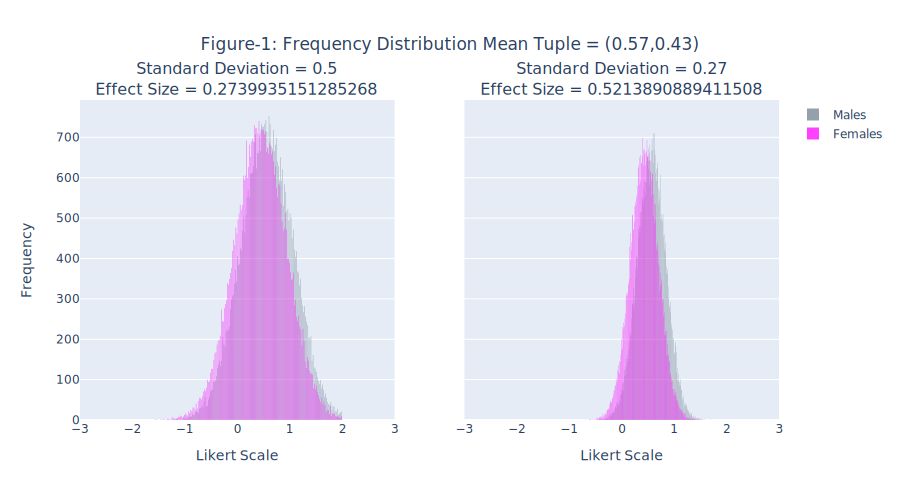

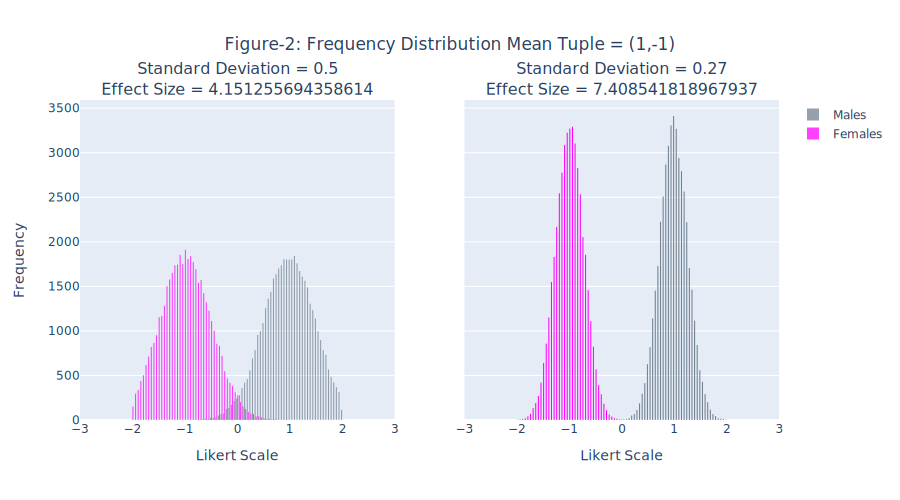

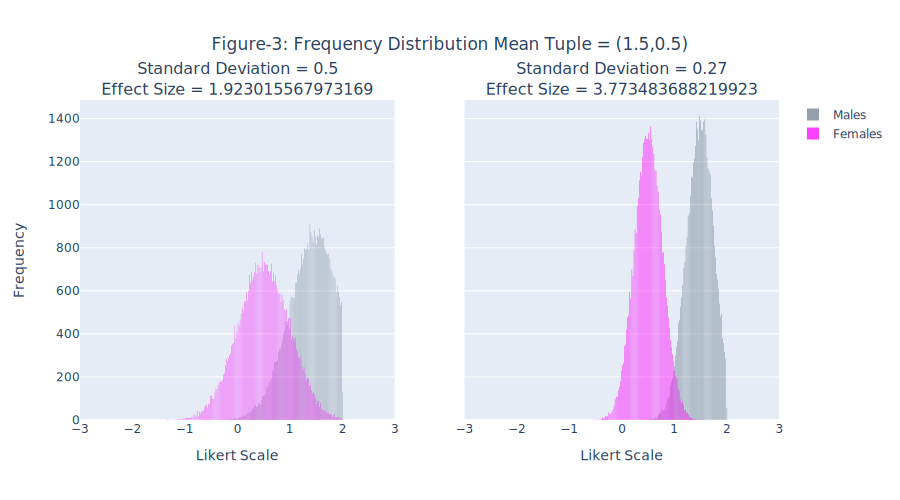

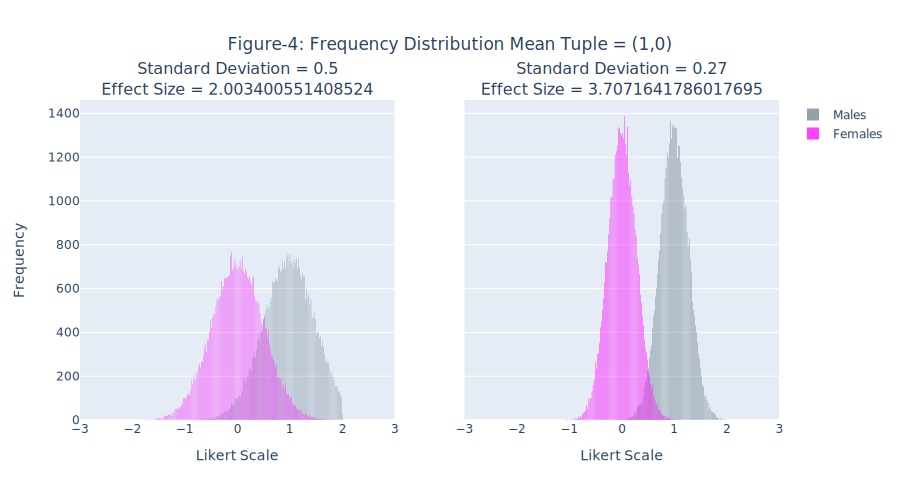

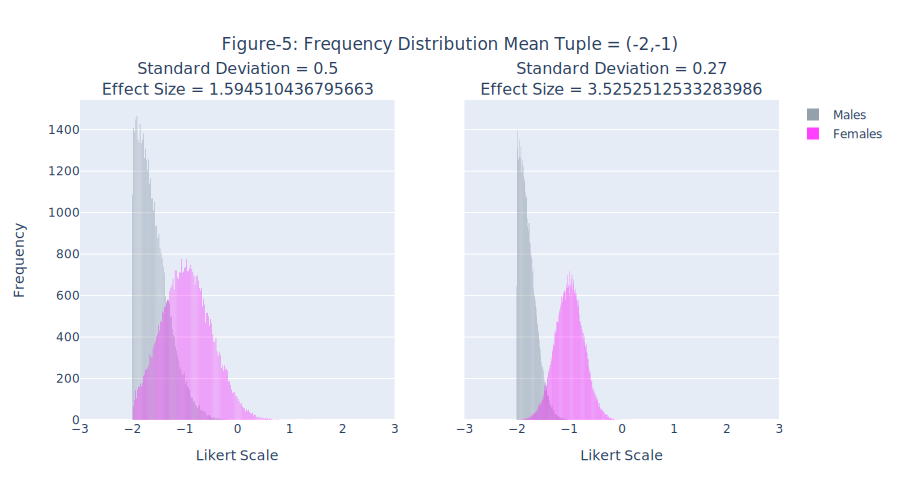

In [23]:
simulate(std_dev[0], std_dev[1], 45, 1000, True, -2, 2, 0, False)

So we try to simulate the distributions through Monte Carlo Simulation using **np.random.normal** and we noticed a lot of variations through Different Mean Tuples and Equal Standard Deviations. But we could also notice that the distibutions are going beyond Upper and Lower Limits of the Likert scale which should not be the case.  

Therefore, in-order to stop this from happening, we use another approach using **truncnorm**.  

After using that we see that the distributions become skewed, but they are centered at the mean values as expected. There is another issue which we could notice, which is that the values simulated are of the decimal form (0.4, 0.6 and so on). Since these values are not from the Likert scale, Therefore, we try to bin them to the likert scale values.  

Since, we are eliminating values with the truncation mode, the mean is shifted. Therefore, we decided to assign the values exceeding the boundary to the extreme Likert Scale value.

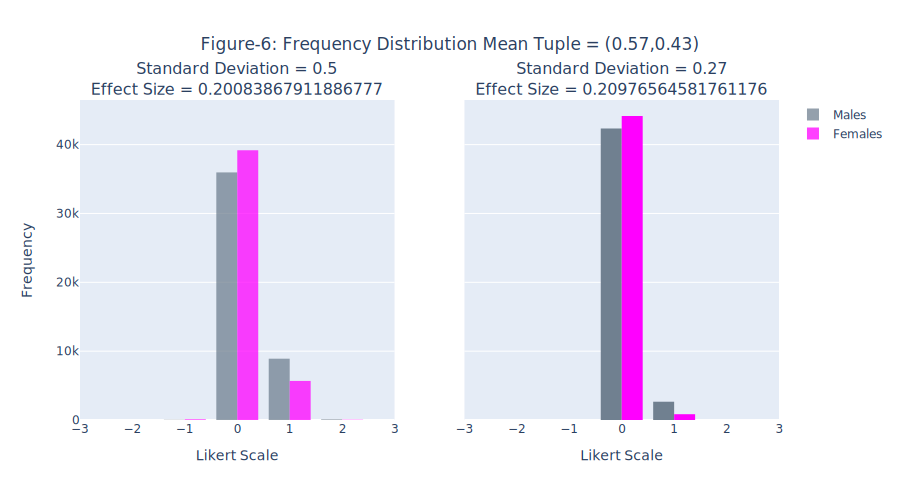

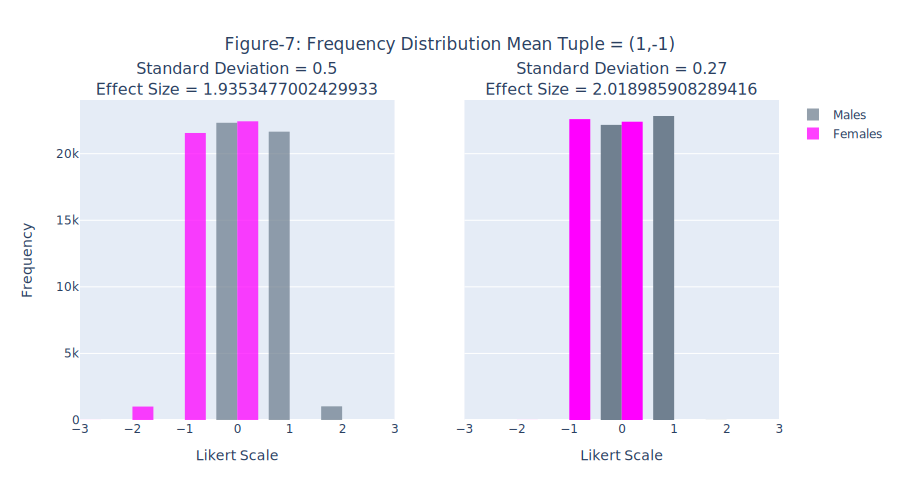

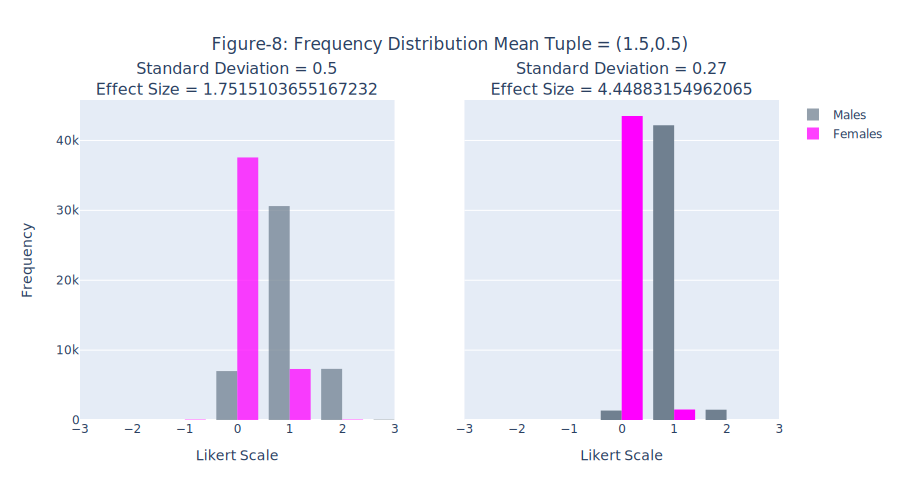

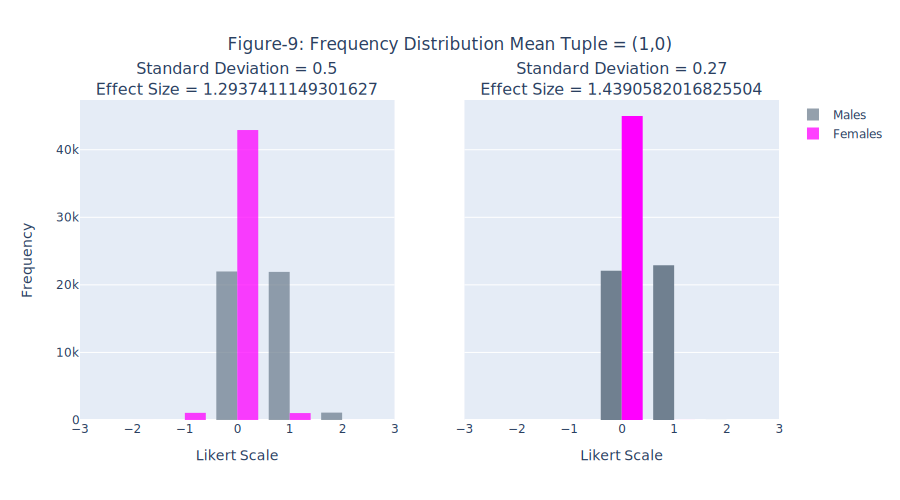

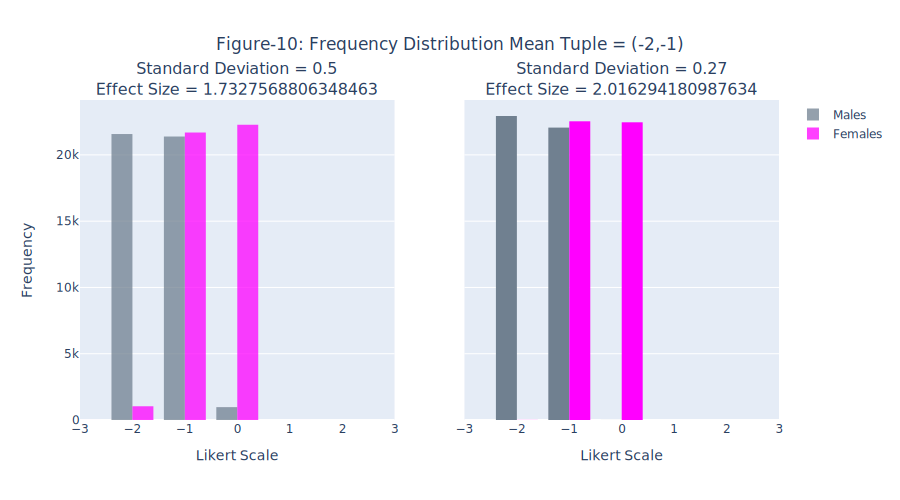

In [24]:
simulate(std_dev[0], std_dev[1], 45, 1000, False, 0, 0, 5, False)

***

#### Question 1.e  
What is your test statistic and why?

#### Solution 1.e

Test Statistic allows us to identify how far our outcome is from the stated null Hypothesis $H_0$. In other words, larger the value of test statistic, our outcome is more number of standard deviations away from the one stated using null Hypothesis $H_0$.  

Therefore, the Test Statistic value is used to either accept or reject the null Hypotheses $H_0$ based on the significance value.  

The test statistic used for this experiment is the Difference of Means. Here we are considering that the two samples have been extracted from the same population, assuming same standard deviation and as we are unaware of the Population Mean and the standard deviation, we will use the means of the two groups and find out the difference between the two. Since, we have our null hypothesis as $H_0$:$\mu 1$=$\mu 2$ (which compares the means from two different groups/samples), thus through this test statistic, we will try to find enough evidence either to accept or reject the null hypothesis $H_0$.

***

#### Question 1.f  
What is your sample size and sampling size? Why?

#### Solution 1.f

Before coming up with the right amount of Samples and Sampling size for the Monte Carlo simulation, we tried with different set of values.  

Keeping the Sampling size as 1, Low Sample Size (N < 10) resulted in a very random frequency distribution. As we increased the sample size, the sampling distribution became more normally distributed and with N = 45, we could see that the sampling distribution following a bell curve.  

On the other hand, with Low Sampling Size (n < 10), the distrubutions were not smooth with multiple gaps in the histogram values. Therefore, we kept on increasing the sampling size till the point (n = 1000), when no more gaps were noticeable ans the distribution took a smoother curve. More number of simulations will surely help reaching the point where the mean of the sampling distribution converges with the Population mean, but it also becomes computationally heavy and resource demanding.  

Therefore, we choose Sample Size of 45 and Sampling Size of 1000 for our study.

***

#### Question 2  
What is the power of the t-test (2 sample, independent) and the Mann-Whitney-U test? Compute for the mean tuples and sds. Interprete your results.

#### Solution 2

**Two Sample Independent t-Test** <br>
Since the groups represent a random sample from the whole population, it is a valid approach to perform a Two-sample t-Test

1. To measure the power of the t test we can simply use the two samples, which are generated based on selected criteria (distribution, sample sizes and effect sizes).
2. The Two Sample t-test is then performed on these samples to determine whether or not there is a significant result.
3. If a large number of such samples are generated at random, we can determine **what percentage of these samples yields a significant result**. This percentage is an **estimate for the power** of the t-test.

In [25]:
from scipy.stats import ttest_ind

mean_tuples = [[0.53, 0.47], [1,-1], [1.5, 0.5], [1, 0], [-2, -1]]
stds=[0.2, 0.3]
alpha = 0.05

def ttest_power_calculator(male_mean, female_mean, std, samples, alpha):
    power = 0

    #monte_carlo_simulation
    for i in range(100):
        
        #creation of random samples 
        male_simulation = np.random.normal(male_mean, std, samples).round(1)
        female_simulation = np.random.normal(female_mean, std, samples).round(1) 
        
        #ttest_ind test
        _,pvalue = ttest_ind(a = male_simulation,      
                             b = female_simulation)
        
        if (pvalue <= alpha):
            power += 0.01
    
    return int(power*100)

In [26]:
alpha = 0.05
samples = 45

for std in std_dev:
  print('****','std: ',std,'****')
  for mean in mean_tuples:
      print ("mean_tuple : ", mean)

      #run montecarlo simulation
      power = ttest_power_calculator(male_mean= mean[0], 
                                     female_mean= mean[1],
                                     std = std, 
                                     samples = samples, 
                                     alpha = alpha)
      print('power: ',power,'%')
  print('\n')

**** std:  0.5 ****
mean_tuple :  [0.53, 0.47]
power:  9 %
mean_tuple :  [1, -1]
power:  100 %
mean_tuple :  [1.5, 0.5]
power:  100 %
mean_tuple :  [1, 0]
power:  100 %
mean_tuple :  [-2, -1]
power:  100 %


**** std:  0.27 ****
mean_tuple :  [0.53, 0.47]
power:  16 %
mean_tuple :  [1, -1]
power:  100 %
mean_tuple :  [1.5, 0.5]
power:  100 %
mean_tuple :  [1, 0]
power:  100 %
mean_tuple :  [-2, -1]
power:  100 %




**Conclusions on t-test:**

Power is the probability that the test correctly rejects the Null Hypothesis if the Alternative Hypothesis is true (i.e. the higher the better).  

After computing the Power of test, we could observe that Higher the Standard Deviation, Lower the Power of Test. Power of Test is dependent on the Standard Deviation and the Sample Means. Since, most of the Means in the mean tuples have significant difference (opposite directions on the Likert Scale), thus Power of Test is 100% for all these scenarios.

**Mann-withney-u test**

Mann–Whitney–Wilcoxon basic assumptions:
- random sampling from each of the two populations 
- that the measurement scale is at least ordinal

our case is therefore eligible for this type of test.

We can run a simultaion to find it out.

1. two samples are generated based on selected criteria (distribution, sample sizes and effect sizes).
1. The Mann-Whitney test is then performed on these samples to determine whether or not there is a significant result.
1. If a large number of such samples are generated at random, we can determine **what percentage of these samples yields a significant result**. This percentage is an **estimate for the power** of the MW test.

[Reference](https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/PASS/Mann-Whitney_U_or_Wilcoxon_Rank-Sum_Tests.pdf)



In [27]:
from scipy.stats import mannwhitneyu

def mw_power_calculator(male_mean, female_mean, std, samples, alpha):
    power = 0

    #monte_carlo_simulation
    for i in range(100):
        
        #creation of random samples 
        male_simulation = np.random.normal(male_mean, std, samples).round(1)
        female_simulation = np.random.normal(female_mean, std, samples).round(1) 
        
        #mann withney-u test
        u,pvalue = mannwhitneyu(x = male_simulation,      
                                y = female_simulation,    
                                use_continuity=True,
                                alternative='two-sided')
        if (pvalue <= alpha):
            power += 0.01
    
    
    return int(power*100)

In [28]:
alpha = 0.05
sample_size = 45

for std in std_dev:
  print('****','std: ',std,'****')
  for mean in mean_tuples:
      print ("mean_tuple : ", mean)

      #run montecarlo simulation
      power = mw_power_calculator(male_mean= mean[0], 
                                  female_mean= mean[1],
                                  std = std, 
                                  samples= sample_size, 
                                  alpha = alpha)
      print('power: ',power,'%')
  print('\n')

**** std:  0.5 ****
mean_tuple :  [0.53, 0.47]
power:  10 %
mean_tuple :  [1, -1]
power:  100 %
mean_tuple :  [1.5, 0.5]
power:  100 %
mean_tuple :  [1, 0]
power:  100 %
mean_tuple :  [-2, -1]
power:  100 %


**** std:  0.27 ****
mean_tuple :  [0.53, 0.47]
power:  10 %
mean_tuple :  [1, -1]
power:  100 %
mean_tuple :  [1.5, 0.5]
power:  100 %
mean_tuple :  [1, 0]
power:  100 %
mean_tuple :  [-2, -1]
power:  100 %




**Conclusions on mannwithney:**

Similarly to the previous one, we could observe that there is no significant difference between the computed Power using T-Test and Mann-Whitney U-Test.

***

#### Question 3  
How could you model common biases (at least 2) and how would they affect the outcome and power? Use the tuple means and sds, compute, interprete, and vizualize.

#### Solution 3

So before proceeding with the computation, we would like to model the following Common Biases:  
- Central Tendency Bias: People tend to go for the middle values instead of the extreme values on the Likert Scale.
- Social Desirability Bias: When people tend to answer the question the way they think is the commonly approved answer rather than going for the actual response.  

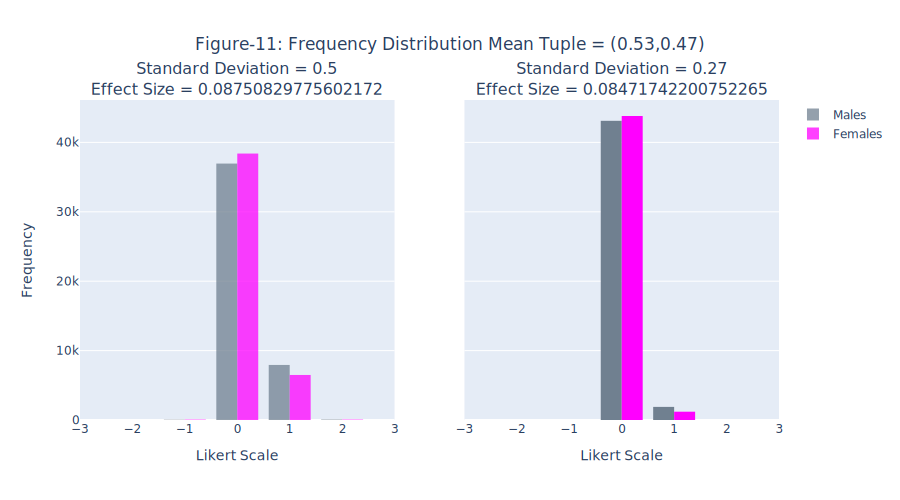

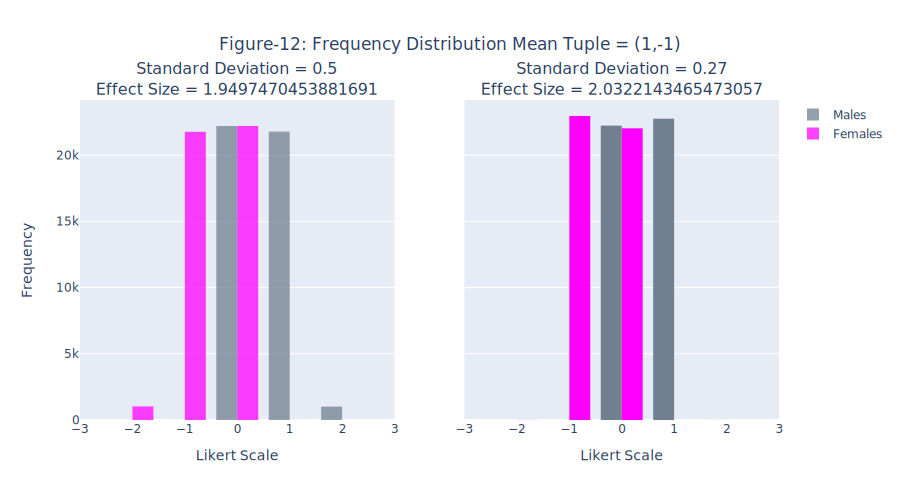

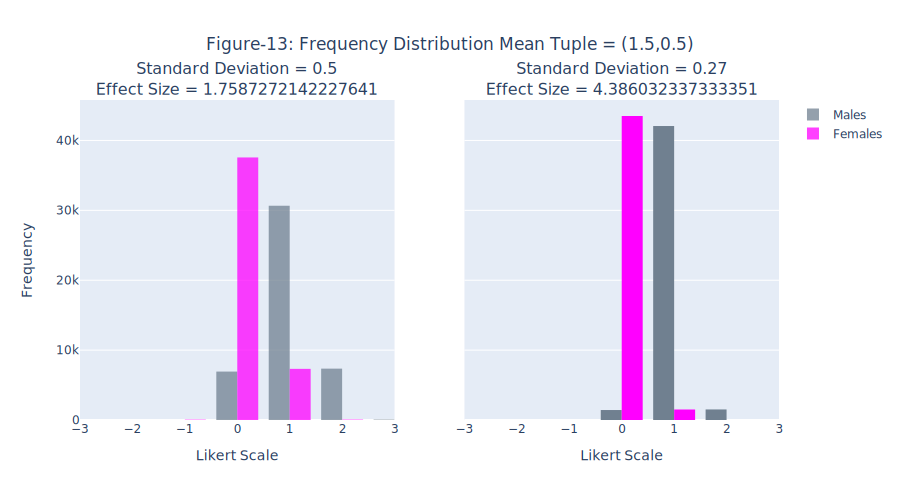

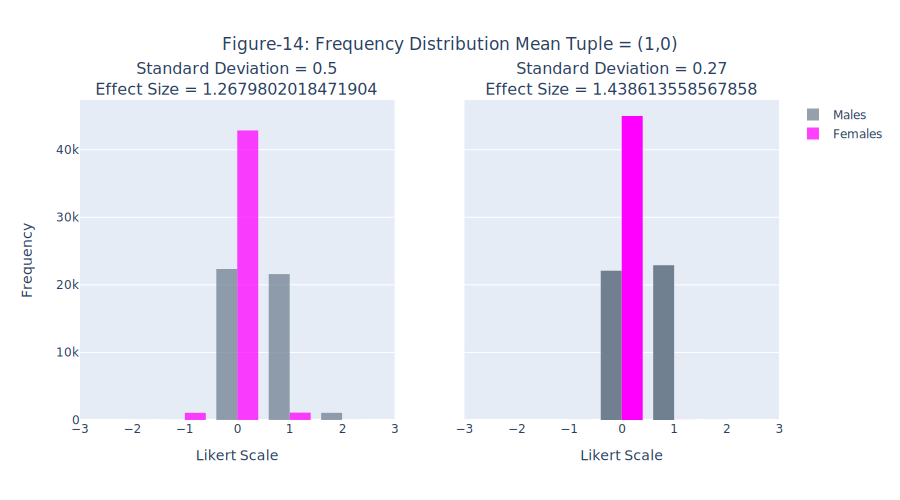

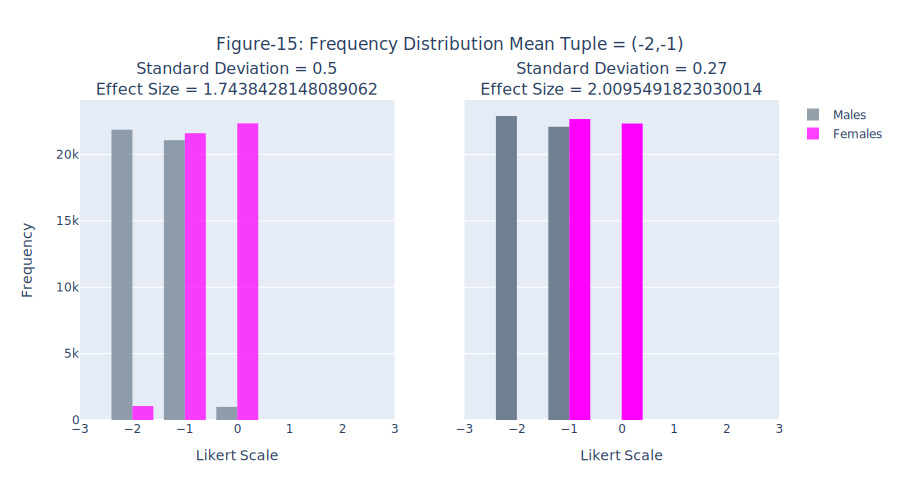

In [29]:
simulate(std_dev[0], std_dev[1], 45, 1000, False, 0, 0, 10, False)

In [30]:
# Method to add the Central Tendency Bias

def add_ct_bias(simulation):
    arr = simulation
    for i in range(len(simulation)):
        if simulation[i] < 0:
            arr[i] = arr[i] + 1
        else:
            arr[i] = arr[i] - 1
    return arr

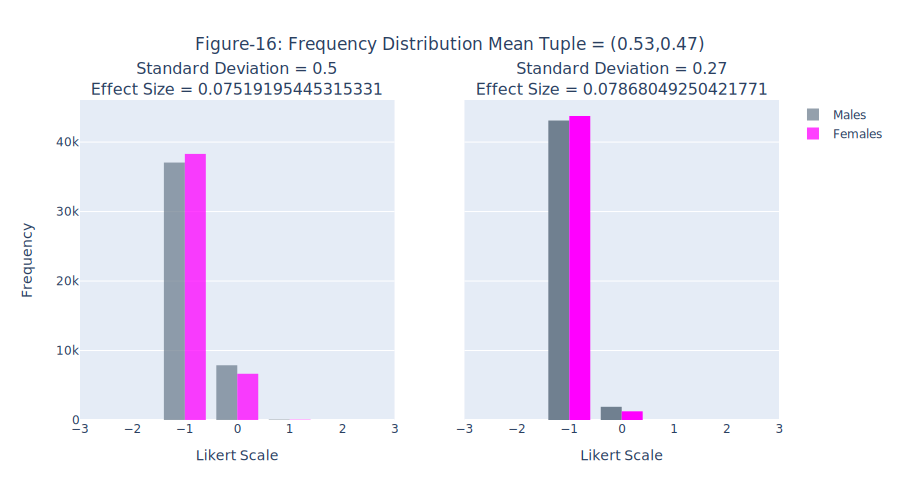

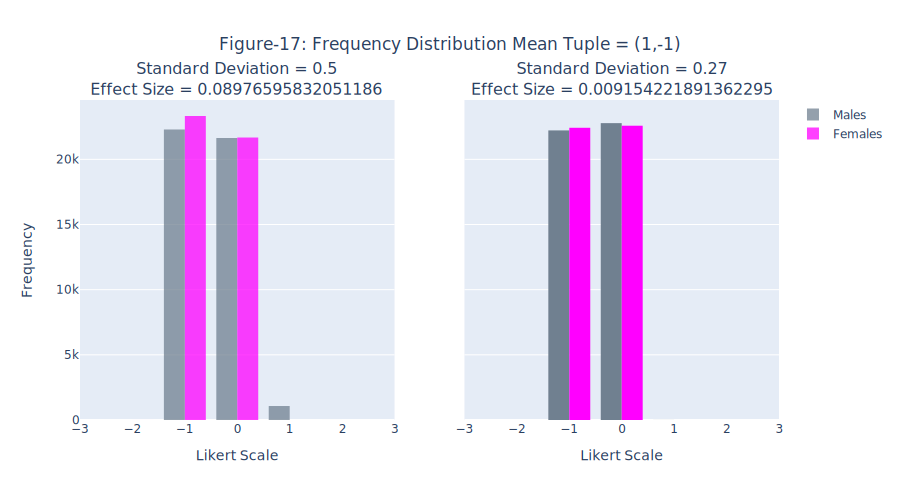

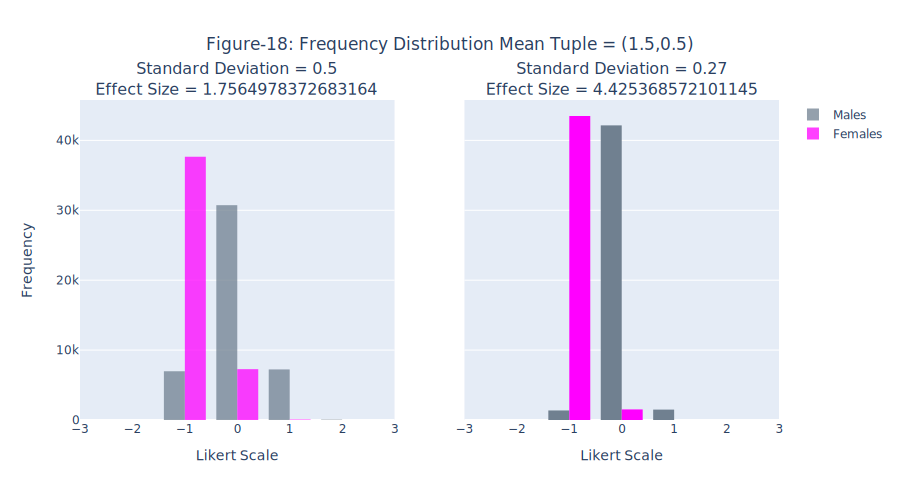

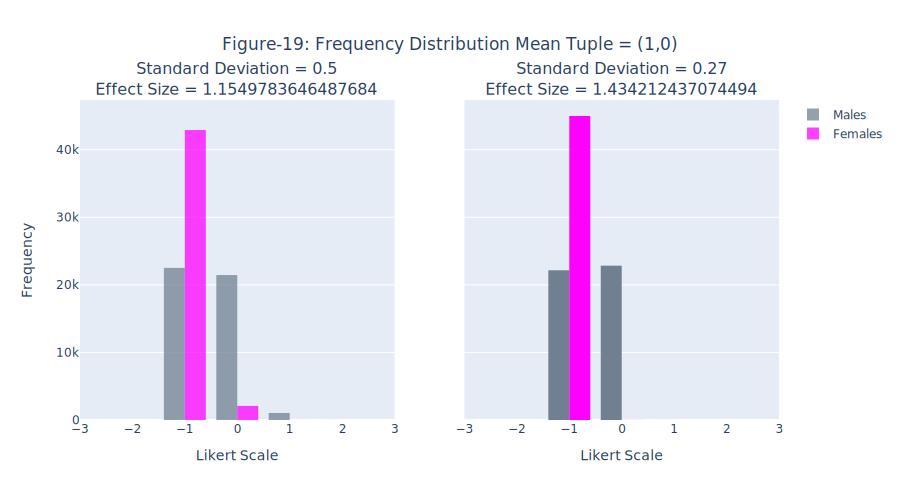

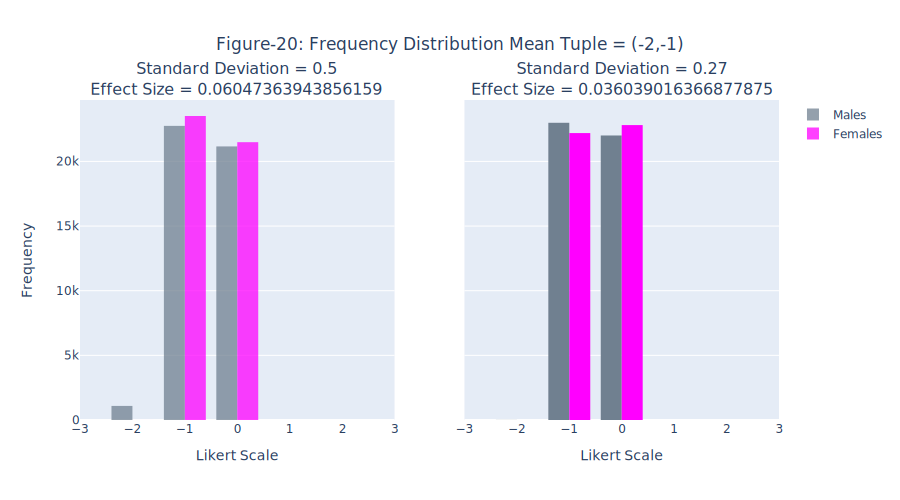

In [35]:
simulate(std_dev[0], std_dev[1], 45, 1000, False, 0, 0, 15, True)

In [36]:
from scipy.stats import mannwhitneyu

def mw_power_calculator(male_mean, female_mean, std, samples, alpha):
    power = 0

    #monte_carlo_simulation
    for i in range(100):
        
        #creation of random samples 
        male_simulation = np.random.normal(male_mean, std, samples).round(1)
        male_simulation = add_ct_bias(male_simulation)
        female_simulation = np.random.normal(female_mean, std, samples).round(1)
        female_simulation = add_ct_bias(female_simulation)
        
        
        #mann withney-u test
        u,pvalue = mannwhitneyu(x = male_simulation,      
                                y = female_simulation,    
                                use_continuity=True,
                                alternative='two-sided')
        if (pvalue <= alpha):
            power += 0.01
    
    
    return int(power*100)

In [37]:
alpha = 0.05
sample_size = 45

for std in std_dev:
  print('****','std: ',std,'****')
  for mean in mean_tuples:
      print ("mean_tuple : ", mean)

      #run montecarlo simulation
      power = mw_power_calculator(male_mean= mean[0], 
                                  female_mean= mean[1],
                                  std = std, 
                                  samples= sample_size, 
                                  alpha = alpha)
      print('power: ',power,'%')
  print('\n')

**** std:  0.5 ****
mean_tuple :  [0.53, 0.47]
power:  3 %
mean_tuple :  [1, -1]
power:  11 %
mean_tuple :  [1.5, 0.5]
power:  100 %
mean_tuple :  [1, 0]
power:  17 %
mean_tuple :  [-2, -1]
power:  100 %


**** std:  0.27 ****
mean_tuple :  [0.53, 0.47]
power:  16 %
mean_tuple :  [1, -1]
power:  7 %
mean_tuple :  [1.5, 0.5]
power:  100 %
mean_tuple :  [1, 0]
power:  27 %
mean_tuple :  [-2, -1]
power:  100 %




As expected, we could see that the Power of Test decresed significantly for almost all the mean tuples through the Central Tendency Bias.  
Social Desirability test on the other hand, will result in a skewed data. Thus, Power of Test will reduce further as the distributions will be more similar and will overlap.

#### Question 4  
For the case (1.5, 0.5), how large would the sample have to be to get a power of 80% at α=5%? Use the different sds.

#### Solution 4

In [38]:
mean = (1.5,0.5)
alpha = 0.05

#parameters
stds=[0.8, 1]
samples = 20

for std in stds:
  print('****','std: ',std,'****')

  #run montecarlo simulation
  power = mw_power_calculator(male_mean= mean[0], 
                              female_mean= mean[1],
                              std = std, 
                              samples= samples, 
                              alpha = alpha)
  print('power: ',power,'%')
  print('\n')

**** std:  0.8 ****
power:  63 %


**** std:  1 ****
power:  56 %




In order to a power of 80% or more for the provided mean tuple (1.5, 0.5) and for standard deviations of (0.8, 1.0), we need more than 12 Samples for Standard Deviation of 0.8 and more than 20 Samples for Standard Deviation of 1.0